# Importing Data and EDA


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load data
df = pd.read_csv("Ecommerce.csv")

# Quick look
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,01-01-2023,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,01-01-2023,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,01-01-2023,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,01-01-2023,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,01-01-2023,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [3]:
df.shape

(22049, 18)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 22049 entries, 0 to 22048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  22049 non-null  str    
 1   Customer_ID               22049 non-null  str    
 2   Date                      22049 non-null  str    
 3   Age                       22049 non-null  int64  
 4   Gender                    22049 non-null  str    
 5   City                      22049 non-null  str    
 6   Product_Category          22049 non-null  str    
 7   Unit_Price                22049 non-null  float64
 8   Quantity                  22049 non-null  int64  
 9   Discount_Amount           22049 non-null  float64
 10  Total_Amount              22049 non-null  float64
 11  Payment_Method            22049 non-null  str    
 12  Device_Type               22049 non-null  str    
 13  Session_Duration_Minutes  22049 non-null  int64  
 14  Pages_Viewed     

In [5]:
X = df[['Age',
        'Total_Amount',
        'Discount_Amount',
        'Session_Duration_Minutes',
        'Pages_Viewed',
        'Unit_Price',
        'Quantity']]

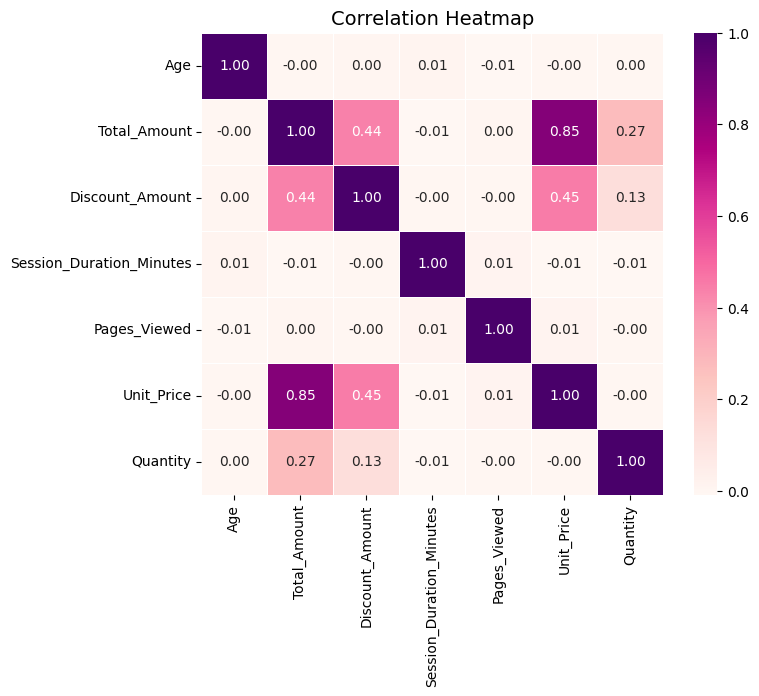

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(
    X.corr(),
    cmap='RdPu',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Clustering for Profiles

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

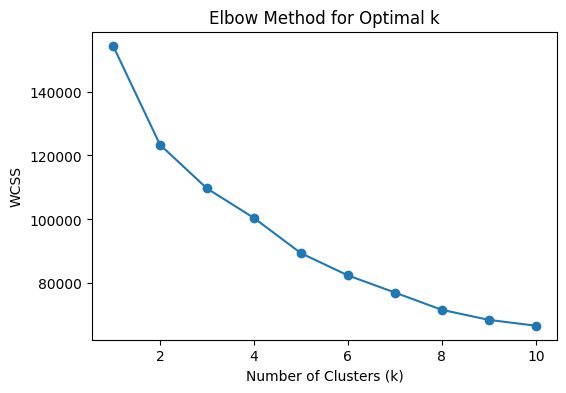

In [9]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=40).fit(X_scaled)
df['Cluster'] = kmeans.predict(X_scaled)
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Cluster
0,ORD_001337,CUST_01337,01-01-2023,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5,1
1,ORD_004885,CUST_04885,01-01-2023,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3,3
2,ORD_004507,CUST_04507,01-01-2023,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2,2
3,ORD_000645,CUST_00645,01-01-2023,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4,1
4,ORD_000690,CUST_00690,01-01-2023,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4,2


In [11]:
df['Cluster'].value_counts()

Cluster
2    7847
1    6997
3    5921
0    1284
Name: count, dtype: int64

In [12]:
df['Cluster'].value_counts(normalize=True)

Cluster
2    0.355889
1    0.317339
3    0.268538
0    0.058234
Name: proportion, dtype: float64

In [13]:
cluster_profile = df.groupby('Cluster')[[ 'Age',
                                          'Total_Amount',
                                          'Discount_Amount',
                                          'Session_Duration_Minutes',
                                          'Pages_Viewed',
                                          'Unit_Price',
                                          'Quantity']].mean()

cluster_profile

,Age,Total_Amount,Discount_Amount,Session_Duration_Minutes,Pages_Viewed,Unit_Price,Quantity
Cluster,,,,,,,
0,34.918224,8018.123450,496.965740,14.401090,9.125389,2635.990343,3.478972
1,27.113763,519.167805,23.740233,13.116336,9.051594,332.779743,1.736458
2,34.045623,1188.821380,46.254074,14.286224,8.972601,291.251110,4.335542
3,45.473231,580.649916,24.811991,16.604459,8.943760,323.750645,1.993413


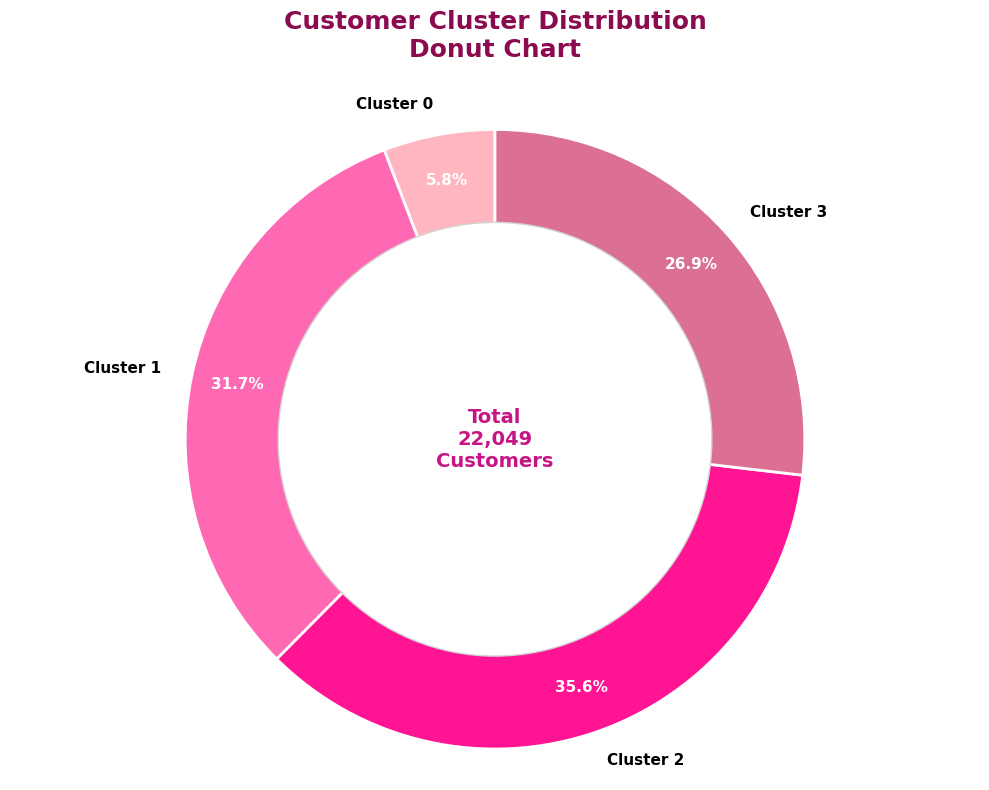

In [22]:
if 'Cluster' in df.columns:
    # Donut chart with gradient pink shades
    plt.figure(figsize=(10, 8))
    
    # Gradient pink shades (light to dark)
    pink_gradient = ['#FFE4E9',  # Very Light Pink
                     '#FFC0CB',  # Pink
                     '#FFB6C1',  # Light Pink
                     '#FF69B4',  # Hot Pink
                     '#FF1493',  # Deep Pink
                     '#DB7093',  # Pale Violet Red
                     '#C71585',  # Medium Violet Red
                     '#8B0A50']  # Dark Pink
    
    num_clusters = df['Cluster'].nunique()
    # Use darker shades for fewer clusters, lighter for more
    if num_clusters <= 4:
        colors_to_use = pink_gradient[2:2+num_clusters]
    else:
        colors_to_use = pink_gradient[:num_clusters]
    
    # Prepare data
    cluster_counts = df['Cluster'].value_counts().sort_index()
    labels = [f'Cluster {i}' for i in cluster_counts.index]
    sizes = cluster_counts.values
    
    # Create donut chart
    wedges, texts, autotexts = plt.pie(sizes, 
                                        labels=labels, 
                                        colors=colors_to_use,
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        pctdistance=0.85,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'},
                                        wedgeprops={'edgecolor': 'white', 'linewidth': 2})
    
    # Draw a white circle at the center to make it a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white', edgecolor='lightgray')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
  # Style the percentage text (make it white)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.title('Customer Cluster Distribution\nDonut Chart', 
              fontsize=18, 
              fontweight='bold', 
              pad=30,
              color='#8B0A50')
    plt.axis('equal')
    
    # Add total count in center
    total = len(df)
    plt.text(0, 0, f'Total\n{total:,}\nCustomers', 
             ha='center', 
             va='center', 
             fontsize=14, 
             fontweight='bold',
             color='#C71585')
    
    plt.tight_layout()
    plt.show()

<Figure size 1000x500 with 0 Axes>

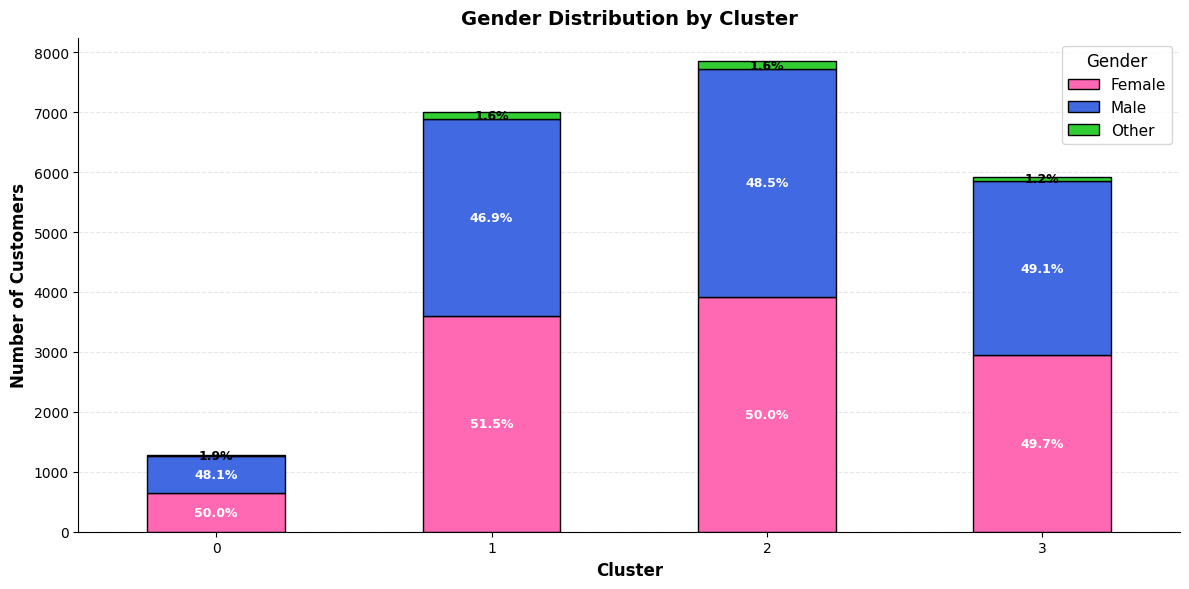

In [17]:
# Simpler version if you know your gender categories
if 'Cluster' in df.columns and 'Gender' in df.columns:
    plt.figure(figsize=(10, 5))
    
    # Prepare data for stacked bar chart
    gender_counts = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
    
    # Define order and colors (adjust based on your actual data)
    gender_order = ['Female', 'Male', 'Other']
    gender_colors = ['#FF69B4', '#4169E1', '#32CD32']  # Pink, Blue, Green
    
    # Reorder columns to match our desired order
    gender_counts = gender_counts.reindex(columns=[g for g in gender_order if g in gender_counts.columns])
    
    # Create stacked bar chart
    ax = gender_counts.plot(kind='bar', 
                            stacked=True, 
                            color=gender_colors[:len(gender_counts.columns)],
                            edgecolor='black',
                            figsize=(12, 6))
    
    plt.title('Gender Distribution by Cluster', 
              fontsize=14, 
              fontweight='bold',
              pad=10)
    plt.xlabel('Cluster', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
    
    # Add percentage labels on each segment
    cluster_totals = gender_counts.sum(axis=1)
    
    for i, cluster in enumerate(gender_counts.index):
        cumulative_height = 0
        for gender in gender_counts.columns:
            count = gender_counts.loc[cluster, gender]
            if count > 0:
                percentage = (count / cluster_totals[i]) * 100
                # Position text in the middle of each segment
                text_color = 'white' if count/cluster_totals[i] > 0.3 else 'black'
                ax.text(i, 
                       cumulative_height + count/2,
                       f'{percentage:.1f}%',
                       ha='center',
                       va='center',
                       fontweight='bold',
                       fontsize=9,
                       color=text_color)
                cumulative_height += count
    
    # Customize legend
    plt.legend(title='Gender', 
               title_fontsize=12,
               fontsize=11,
               loc='upper right')
    
    # Customize grid and spines
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Checking the accuracy of the clustering

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X_dt = X
y_dt = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X_dt, y_dt, test_size=0.3, random_state=42
)

In [24]:
dt_model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [25]:
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9052154195011338

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 324,   21,   12,   27],
       [   8, 1967,    0,  102],
       [   2,  220, 2052,   79],
       [   7,  106,   43, 1645]])

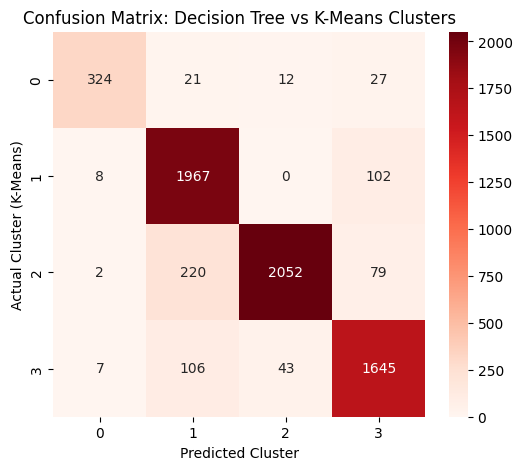

In [28]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=sorted(df['Cluster'].unique()),
    yticklabels=sorted(df['Cluster'].unique())
)

plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Cluster (K-Means)")
plt.title("Confusion Matrix: Decision Tree vs K-Means Clusters")
plt.show()

In [29]:
import numpy as np
import pandas as pd

n_clusters = cm.shape[0]
results = []

total = cm.sum()

for i in range(n_clusters):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = total - TP - FN - FP
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    results.append([
        i,
        round(sensitivity, 2),
        round(specificity, 2)
    ])

df = pd.DataFrame(results, columns=["Cluster", "Sensitivity", "Specificity"])

print(df)

   Cluster  Sensitivity  Specificity
0        0         0.84         1.00
1        1         0.95         0.92
2        2         0.87         0.99
3        3         0.91         0.96


# FINAL CLUSTER PROFILES AND BUSINESS RECOMMENDATIONS

## Cluster 0: High-Value Premium Buyers
These customers represent the most valuable segment, contributing the highest revenue per customer. They tend to purchase expensive products and buy in relatively higher quantities, indicating strong purchasing power and preference for premium offerings.

### Key Behaviour Insights:
- Extremely high average spend (₹8018), the highest among all clusters
- Very high unit price purchases (₹2636), indicating preference for premium products
- Higher purchase quantity (3.48 units on average)
- Moderate session duration (14.4 minutes), suggesting efficient decision-making
- Above-average pages viewed, showing focused but confident browsing

### Business Suggestions:
- Introduce loyalty programs and VIP memberships
- Offer exclusive premium deals and early product access
- Provide personalized recommendations and concierge-style services
- Focus on premium and high-margin product categories


## Cluster 1: Low-Spend Casual Browsers
This segment consists of customers who spend the least and purchase fewer items. They browse products but show lower conversion into high-value purchases, suggesting price sensitivity or exploratory behaviour.

### Key Behaviour Insights:
- Lowest average spend (₹519)
- Lowest quantity purchased (1.74 units)
- Low unit price purchases (₹333), indicating budget preferences
- Shorter session duration (13.1 minutes)
- Moderate browsing activity without strong purchase commitment

### Business Suggestions:
- Provide targeted discounts and entry-level offers
- Use conversion nudges like limited-time deals
- Offer affordable product bundles
- Use retargeting advertisements to increase conversions


## Cluster 2: Bulk Value Seekers
These customers purchase the highest quantities and are motivated by value and affordability. They respond well to discounts and tend to maximize quantity rather than spending on premium products.

### Key Behaviour Insights:
- Highest quantity purchased (4.34 units), highest among all clusters
- Moderate overall spend (₹1189)
- Low unit price purchases (₹291), indicating price sensitivity
- Moderate discount utilization (₹46)
- Average browsing and session duration

### Business Suggestions:
- Provide volume discounts and bundle pricing
- Offer wholesale-style pricing incentives
- Promote combo offers and bulk purchase deals
- Encourage cross-selling to increase overall order value


## Cluster 3: Older Selective Buyers
This segment consists of older customers who spend moderately and take more time during sessions, indicating careful and selective purchasing behaviour.

### Key Behaviour Insights:
- Oldest average age group (45.5 years)
- Moderate spending level (₹581)
- Moderate unit price purchases (₹324)
- Longest session duration (16.6 minutes), indicating careful evaluation
- Moderate quantity purchased (1.99 units)

### Business Suggestions:
- Focus on trust-building and product quality messaging
- Provide personalized recommendations
- Offer loyalty rewards and retention programs
- Promote reliable, practical, and high-quality products